In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the 2025 dataset

In [3]:
file_path = "2025_data.xlsx"
df_fe = pd.read_excel(file_path, sheet_name='FEguide')
df_ev = pd.read_excel(file_path, sheet_name='EV')

In [4]:
# Filter for Base Toyota Corolla (LE)

In [5]:
corolla_le = df_fe[
    (df_fe['Carline'].str.contains('Corolla', case=False, na=False)) & 
    (~df_fe['Carline'].str.contains('Hybrid|Cross|GR', case=False, na=False))
].copy()

In [8]:
# Filter for Tesla Model 3 RWD (Base),look for 'Model 3' AND 'Rear-Wheel' 
# Allowed 'Long Range' but strictly excluded 'Performance' and 'AWD'
tesla_rwd = df_ev[
    (df_ev['Carline'].str.contains('Model 3', case=False, na=False)) & 
    (df_ev['Carline'].str.contains('Rear-Wheel|RWD', case=False, na=False)) &
    (~df_ev['Carline'].str.contains('Performance|AWD', case=False, na=False))
].copy()

In [9]:
# Standardize Columns
# Both sheets map primary energy costs to 'Annual Fuel1 Cost - Conventional Fuel'

In [10]:
corolla_le['Annual_Cost'] = corolla_le['Annual Fuel1 Cost - Conventional Fuel']
tesla_rwd['Annual_Cost'] = tesla_rwd['Annual Fuel1 Cost - Conventional Fuel']

In [11]:
# Create the final 2-row comparison table

In [12]:
comparison = pd.concat([
    corolla_le[['Mfr Name', 'Carline', 'Annual_Cost']].head(1),
    tesla_rwd[['Mfr Name', 'Carline', 'Annual_Cost']].head(1)
]).reset_index(drop=True)

#Final Calculation: 5-Year Ownership Total
comparison['5_Year_Total'] = comparison['Annual_Cost'] * 5

In [13]:
# Display the final results

In [15]:
print("Strict Base Model Comparison (2025)")
print(comparison)

Strict Base Model Comparison (2025)
  Mfr Name                 Carline  Annual_Cost  5_Year_Total
0   Toyota                 COROLLA       1500.0        7500.0
1    Tesla  Model 3 Long Range RWD        600.0        3000.0


In [16]:
# Visualization

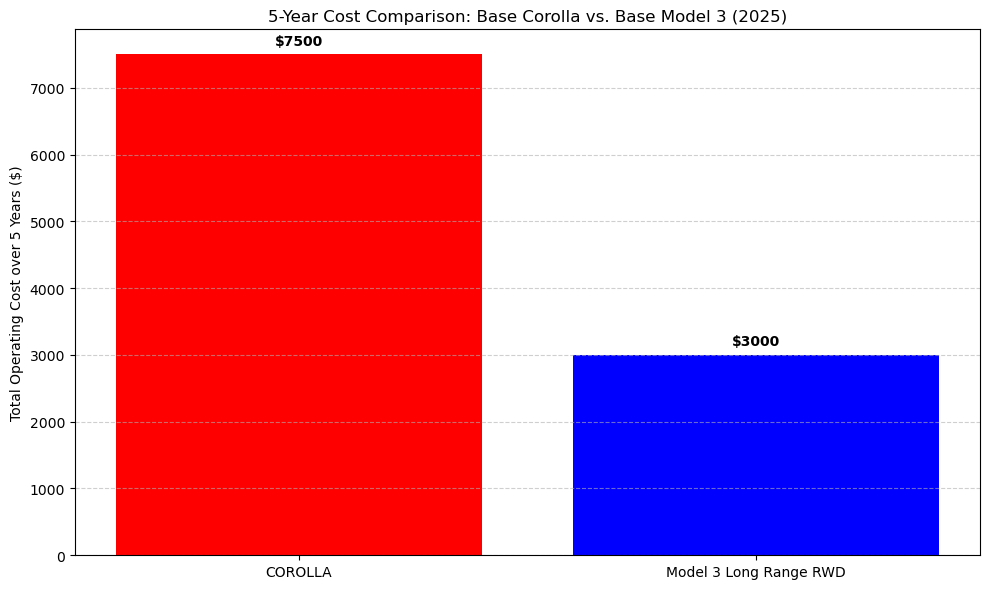

In [20]:
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison['Carline'], comparison['5_Year_Total'], color=['red', 'blue'])
plt.title('5-Year Cost Comparison: Base Corolla vs. Base Model 3 (2025)')
plt.ylabel('Total Operating Cost over 5 Years ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding data labels for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, f'${int(yval)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()